# Predicting Loan Approval
Using the given dataset, we have to predict weather the loan will be approved or not.

## Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Dataset

In [2]:
df_1 = pd.read_csv('train_loan_accept.csv')
df_2 = pd.read_csv('test_loan_accept.csv')

In [3]:
df_1.shape

(614, 13)

In [4]:
df_2.shape

(367, 12)

In [5]:
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the data

- Handling the missing values

In [7]:
df_1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
df_1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

It is observed that train and test datasets has missing values and in the numerical variables the missing values are replaced by their mean or median and in catogorical variables we use mode.

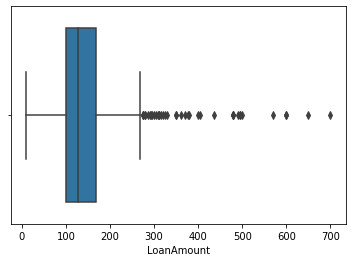

In [10]:
#Analysing loan Amount for outliers,before making choice beteween mean and median we have to check for outliers.
sns.boxplot(x="LoanAmount", data=df_1);

In [11]:
Q1 = df_1['LoanAmount'].quantile(0.25)
Q3 = df_1['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit,upper_limit)

-2.0 270.0


In [13]:
outlier=[]
for x in df_1['LoanAmount']:
    if ((x<low_limit) or (x>upper_limit)):
        outlier.append(x)

outlier


[349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [14]:
len(outlier)

39

we will not remove the outliers becuase there are 39/614, which means it has 6.3% amount of data in whole. we will use median to replace the missing value, becuase median is not affected by the outliers.

In [15]:
#In train data handling missing values in numerical columns-mean, meadian
df_1['LoanAmount']=df_1['LoanAmount'].fillna(df_1['LoanAmount'].median())
df_1['Loan_Amount_Term']=df_1['Loan_Amount_Term'].fillna(df_1['Loan_Amount_Term'].mean())
df_1['Credit_History']=df_1['Credit_History'].fillna(df_1['Credit_History'].mean())

In [16]:
#In train data handling missing values in catogorical columns-mode
df_1['Gender']=df_1['Gender'].fillna(df_1['Gender'].mode()[0])
df_1['Married']=df_1['Married'].fillna(df_1['Married'].mode()[0])
df_1['Dependents']=df_1['Dependents'].fillna(df_1['Dependents'].mode()[0])
df_1['Self_Employed']=df_1['Self_Employed'].fillna(df_1['Self_Employed'].mode()[0])

In [17]:
#Handling the missing values in test data
df_2['LoanAmount']=df_2['LoanAmount'].fillna(df_1['LoanAmount'].median())
df_2['Loan_Amount_Term']=df_2['Loan_Amount_Term'].fillna(df_1['Loan_Amount_Term'].mean())
df_2['Credit_History']=df_2['Credit_History'].fillna(df_1['Credit_History'].mean())
df_2['Gender']=df_2['Gender'].fillna(df_1['Gender'].mode()[0])
df_2['Married']=df_2['Married'].fillna(df_1['Married'].mode()[0])
df_2['Dependents']=df_2['Dependents'].fillna(df_1['Dependents'].mode()[0])
df_2['Self_Employed']=df_2['Self_Employed'].fillna(df_1['Self_Employed'].mode()[0])

## Exploratory Data Analysis

In [18]:
df_1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.842199
std,6109.041673,2926.248369,84.107233,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- Here mean of `ApplicantIncome` is much greater than median, Hence it is Right skewed in nature.

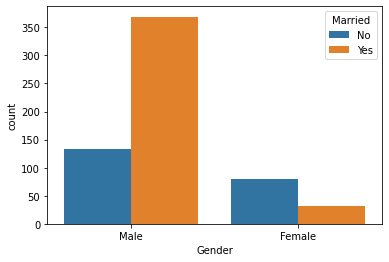

In [19]:
#Categorical attribute visualisation
sns.countplot(x='Gender',hue='Married',data=df_1);

Above 500 applicants are male and majority are married and female applicants are about 100.

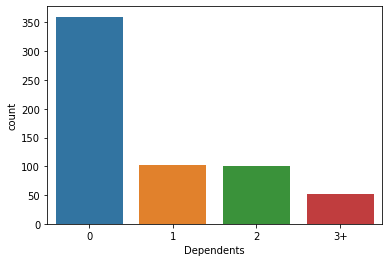

In [20]:
sns.countplot(df_1['Dependents']);

There are no dependents for majority of applicants and very few applicants like 55 have 3+ dependents.

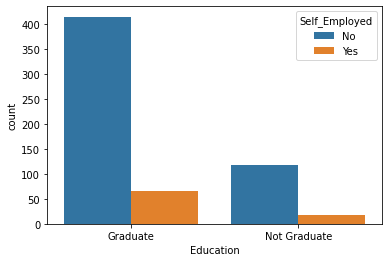

In [21]:
sns.countplot(x=df_1['Education'],hue=df_1['Self_Employed'])

There are about 475 Graduate applicants and majory are not self employeed and rest are not educated and very few are self employed.

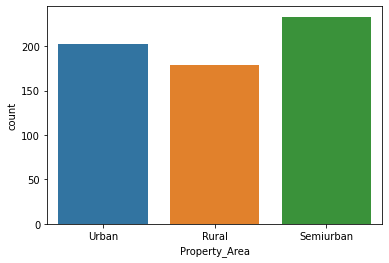

In [22]:
sns.countplot(df_1['Property_Area']);

Applicants belonging to Semi urban and urban are around 240 and 200 respectively and remaing belong to Rural area.

## Checking for Imbalance in the data

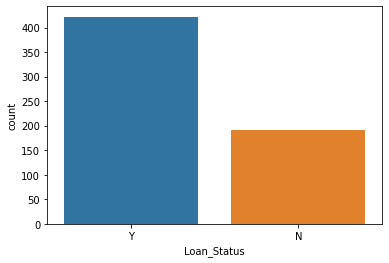

In [23]:
sns.countplot(df_1['Loan_Status']);

In [24]:
approved = df_1.loc[df_1['Loan_Status']=='Y','Loan_Status']
approved_per = len(approved)/len(df_1)
not_approved = df_1.loc[df_1['Loan_Status']=='N', 'Loan_Status']
not_approved_per = len(not_approved)/len(df_1)
print('{} people got loan approval'.format(approved_per))
print('{} people application got rejected'.format(not_approved_per))

0.6872964169381107 people got loan approval
0.3127035830618892 people application got rejected


The people with Loan acceptence is around 69% and about 200 people don't get loan approval. There is a confirmation that the data has imbalance in classes.

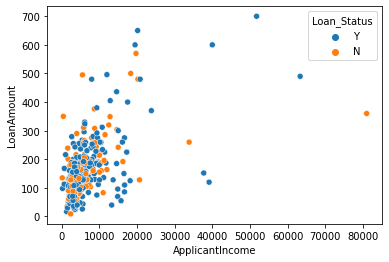

In [25]:
#Analysing numerical attributes
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df_1)

The following scatterplot between `ApplicantIncome` and `LoanAmount` indicates that most of persons has income with in 20000 and loan amount under 400, mainly people wanted to have a loan for lesser amount. This is shown by the distribution of points at left bottom of the figure. We can also see that loan status is not affected by the amount of loan or applicant's income. It varies through out the data.

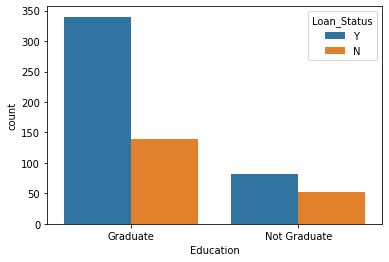

In [26]:
sns.countplot(x="Education", hue="Loan_Status", data=df_1);

It is seen that most of the people in both the category get loan, but the graduated persons has a chance of easy approval of loan.

In [27]:
df_1['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

## Creating a new attributes

In [28]:
#Calculating the total income
df_1['Total_Income']= df_1['ApplicantIncome']+df_1['CoapplicantIncome']
df_2['Total_Income']= df_2['ApplicantIncome']+df_2['CoapplicantIncome']

In [29]:
df_1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income         float64
dtype: object

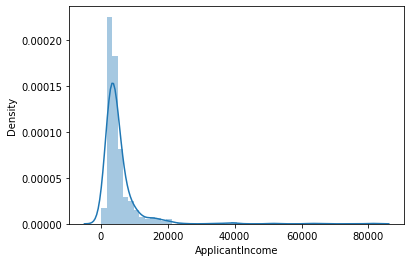

In [30]:
#Analysing numerical attributes
sns.distplot(df_1['ApplicantIncome']);

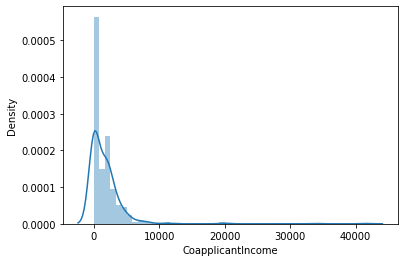

In [31]:
sns.distplot(df_1["CoapplicantIncome"]);

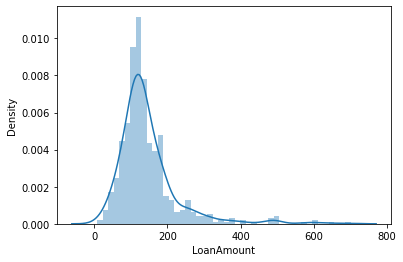

In [32]:
sns.distplot(df_1['LoanAmount']);

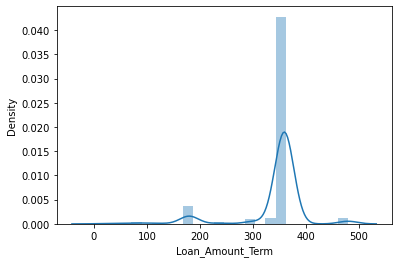

In [33]:
sns.distplot(df_1['Loan_Amount_Term']);

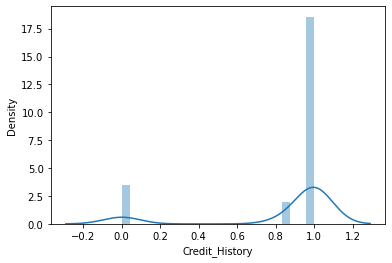

In [34]:
sns.distplot(df_1['Credit_History']);

Since all the variables above has noise in the data hence we can apply transformations on the variables to reduce the noise.

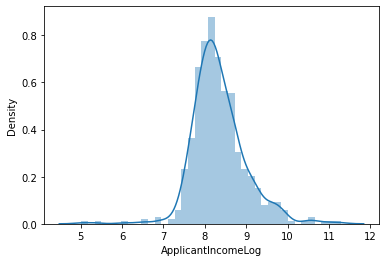

In [35]:
#Apply log transformation to the above variables
df_1['ApplicantIncomeLog']=np.log(df_1['ApplicantIncome']+1)
sns.distplot(df_1['ApplicantIncomeLog'])

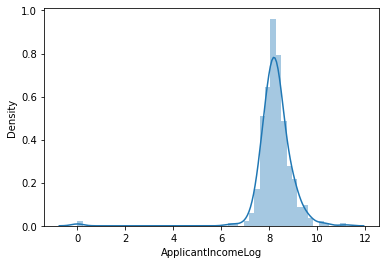

In [39]:
df_2['ApplicantIncomeLog']=np.log(df_2['ApplicantIncome']+1)
sns.distplot(df_2['ApplicantIncomeLog'])

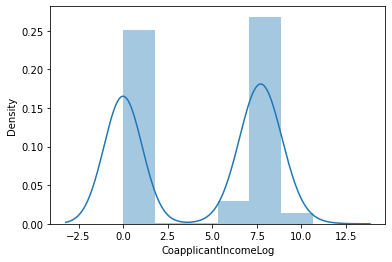

In [40]:
df_1['CoapplicantIncomeLog'] = np.log(df_1['CoapplicantIncome']+1)
sns.distplot(df_1["CoapplicantIncomeLog"])

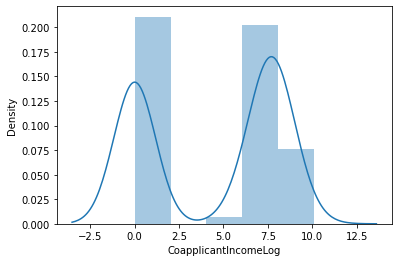

In [41]:
df_2['CoapplicantIncomeLog'] = np.log(df_2['CoapplicantIncome']+1)
sns.distplot(df_2["CoapplicantIncomeLog"])

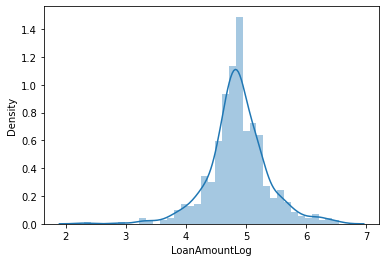

In [42]:
df_1['LoanAmountLog'] = np.log(df_1['LoanAmount']+1)
sns.distplot(df_1["LoanAmountLog"]);

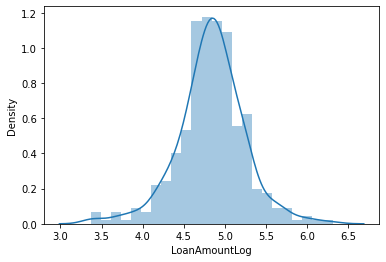

In [43]:
df_2['LoanAmountLog'] = np.log(df_2['LoanAmount']+1)
sns.distplot(df_2["LoanAmountLog"])

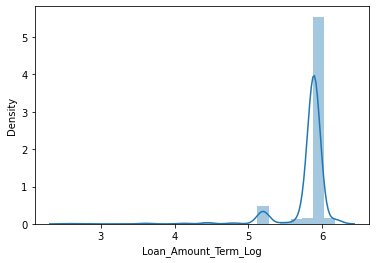

In [44]:
df_1['Loan_Amount_Term_Log'] = np.log(df_1['Loan_Amount_Term']+1)
sns.distplot(df_1["Loan_Amount_Term_Log"])

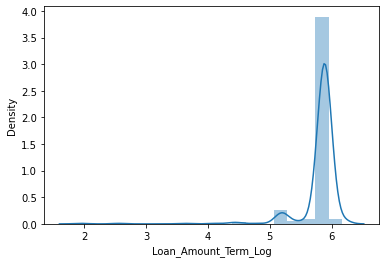

In [45]:
df_2['Loan_Amount_Term_Log'] = np.log(df_2['Loan_Amount_Term']+1)
sns.distplot(df_2["Loan_Amount_Term_Log"])

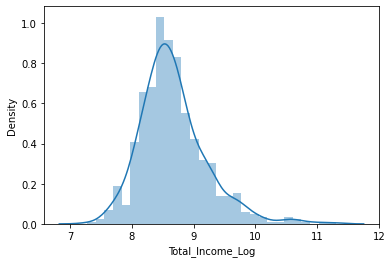

In [46]:
df_1['Total_Income_Log'] = np.log(df_1['Total_Income']+1)
sns.distplot(df_1["Total_Income_Log"])

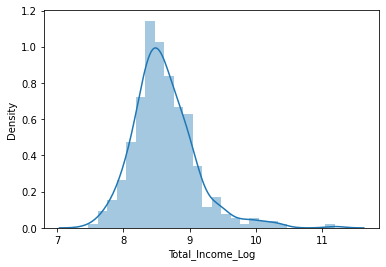

In [47]:
df_2['Total_Income_Log'] = np.log(df_2['Total_Income']+1)
sns.distplot(df_2["Total_Income_Log"])

In [48]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID','CoapplicantIncomeLog']
df_1 = df_1.drop(columns=cols, axis=1)

In [49]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID','CoapplicantIncomeLog']
df_2 = df_2.drop(columns=cols, axis=1)

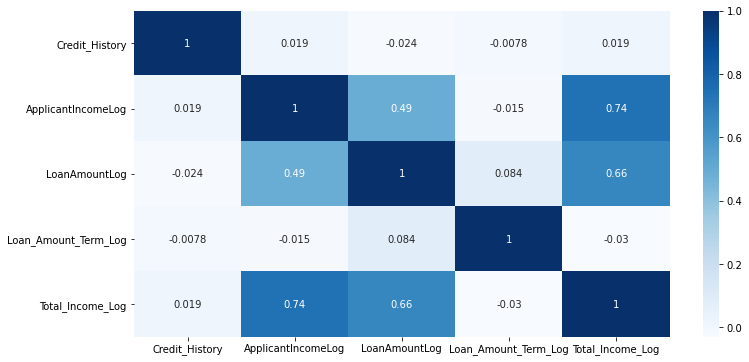

In [50]:
corr_variables=df_1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_variables,annot=True,cmap='Blues')

Since `ApplicantIncomeLog` is highly correlated with `Total_Income_Log` hence we drop that variable.

In [51]:
df_1.drop(['ApplicantIncomeLog'],axis=1,inplace=True)
df_2.drop(['ApplicantIncomeLog'],axis=1,inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
encoder = LabelEncoder()
for col in cols:
    df_1[col] = encoder.fit_transform(df_1[col])

In [53]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
encoder = LabelEncoder()
for col in cols:
    df_2[col] = encoder.fit_transform(df_2[col])

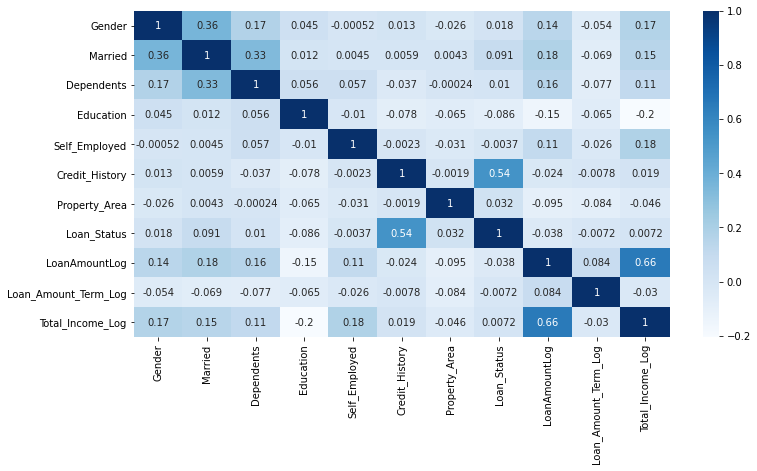

In [54]:
corr_variables=df_1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_variables,annot=True,cmap='Blues')

In [57]:
#Seperating the features and target variable
X = df_1.drop(columns=['Loan_Status'], axis=1)
y = df_1['Loan_Status']

In [58]:
print(X.shape)
print(y.shape)

(614, 10)
(614,)


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(491, 10)
(491,)
(123, 10)
(123,)


In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
cross_validation_score=cross_val_score(model,x_train,y_train,cv=5)
y_predictions=model.predict(x_test)

report=classification_report(y_test,y_predictions)
print('Mean cross validation accuracy: ',np.mean(cross_validation_score))
print('Accuracy on train dataset: ',model.score(x_train,y_train))
print('Accuracy on test dataset: ',model.score(x_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predictions))
print('Classification Report:\n',report)

Mean cross validation accuracy:  0.8105545248402392
Accuracy on train dataset:  0.8105906313645621
Accuracy on test dataset:  0.8048780487804879
Confusion Matrix:
 [[17 21]
 [ 3 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



In [65]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
cross_validation_score=cross_val_score(model2,x_train,y_train,cv=5)
y_predictions=model2.predict(x_test)
report=classification_report(y_test,y_predictions)
print('Mean cross validation score: ',np.mean(cross_validation_score))
print('Accuracy on train data: ',model2.score(x_train,y_train))
print('Accuracy on test data: ',model2.score(x_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predictions))
print('Classification Report:\n',report)

Mean cross validation score:  0.788126159554731
Accuracy on train data:  1.0
Accuracy on test data:  0.7886178861788617
Confusion Matrix:
 [[20 18]
 [ 8 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.53      0.61        38
           1       0.81      0.91      0.86        85

    accuracy                           0.79       123
   macro avg       0.76      0.72      0.73       123
weighted avg       0.78      0.79      0.78       123



From above evaluation the RandomForest Classifier is overfitting, since we have a train accuaray=1 and test accuracy=0.78. Here we can control it by controlling max_features(reducing max_features), n_estimators: The more trees, the less likely the algorithm is to overfit.

## Hyper parameter tuining for RandomForest Classifier

In [70]:
params = {"n_estimators":[100,200,300,500],
              "max_features": [1,2,3,4,5,6],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20],
                'min_samples_leaf':[1,2,5,10,15,20], 
                #'min_samples_split':[2,5,10,15,20]
                  }

In [67]:
#Total combinations
4*6*2*2*2*5*6

5760

We need to slect 5-10% of combinations to pick randomly for hyperparameter tuning. Hence 5% of combination is around 285.

In [71]:
from sklearn.model_selection import RandomizedSearchCV

model2 = RandomForestClassifier()
random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=100,scoring='accuracy',cv=5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [72]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [75]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.811 (std: 0.01694)
Parameters: {'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 1
Mean validation score: 0.811 (std: 0.01694)
Parameters: {'n_estimators': 500, 'min_samples_leaf': 20, 'max_features': 4, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 1
Mean validation score: 0.811 (std: 0.01694)
Parameters: {'n_estimators': 200, 'min_samples_leaf': 15, 'max_features': 4, 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}

Model with rank: 1
Mean validation score: 0.811 (std: 0.01694)
Parameters: {'n_estimators': 500, 'min_samples_leaf': 15, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}

Model with rank: 1
Mean validation score: 0.811 (std: 0.01694)
Parameters: {'n_estimators': 200, 'min_samples_lea

In [77]:
model2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model2.fit(x_train,y_train)
cross_validation_score_rf=cross_val_score(model2,x_train,y_train,cv=5)
y_predictions=model2.predict(x_test)
report_rf=classification_report(y_test,y_predictions)
print('Mean cross validation score: ',np.mean(cross_validation_score_rf))
print('Accuracy on train data: ',model2.score(x_train,y_train))
print('Accuracy on test data: ',model2.score(x_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predictions))
print('Classification Report:\n',report_rf)

Mean cross validation score:  0.8105545248402392
Accuracy on train data:  0.8105906313645621
Accuracy on test data:  0.8048780487804879
Confusion Matrix:
 [[17 21]
 [ 3 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        38
           1       0.80      0.96      0.87        85

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



In [66]:
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(x_train,y_train)
cross_validation_score=cross_val_score(model,x_train,y_train,cv=5)
y_predictions=model.predict(x_test)
report=classification_report(y_test,y_predictions)  
print('Mean cross validation score: ',np.mean(cross_validation_score))
print('Accuracy on train data: ', model.score(x_train,y_train))
print('Accuracy on test data: ', model.score(x_test,y_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predictions))
print('Classification Report:\n',report)

Mean cross validation score:  0.7841063698206555
Accuracy on train data:  0.879837067209776
Accuracy on test data:  0.8048780487804879
Confusion Matrix:
 [[20 18]
 [ 6 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.62        38
           1       0.81      0.93      0.87        85

    accuracy                           0.80       123
   macro avg       0.79      0.73      0.75       123
weighted avg       0.80      0.80      0.79       123

